In [ ]:
import torch
import numpy as np
from torch import nn
from tqdm.notebook import tqdm

# create data: features, labels

In [ ]:
N = 100
num_features = 20
X = torch.randn((N, num_features))

In [ ]:
X

In [ ]:
X.shape

In [ ]:
X.type

In [ ]:
y = torch.rand((N))

In [ ]:
y

# create a model

In [9]:
class Regression(nn.Module):
    def __init__(self, num_features):
        super(Regression, self).__init__()
        self.num_features = num_features
        self.linear = nn.Linear(self.num_features, 1)
        self.relu = nn.ReLU()
        self.loss = nn.MSELoss()
        
    def forward(self, x, y):
        out = self.relu(self.linear(x))
        loss = self.loss(out, y)
        return loss

In [10]:
lr_model = Regression(num_features)

In [11]:
loss = lr_model(X, y)
loss.backward()

/root/Anaconda3/envs/pytorch1.3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [12]:
for params in lr_model.parameters():
    print(params, params.grad)

Parameter containing:
tensor([[-0.1950, -0.0238,  0.1140,  0.1107,  0.1568, -0.0349, -0.1240, -0.0158,
         -0.2097,  0.1383, -0.0074,  0.1452, -0.1919, -0.0744, -0.1562,  0.2226,
          0.2059, -0.1474,  0.1694,  0.1379]], requires_grad=True) tensor([[-0.1539,  0.0980,  0.0591,  0.0715,  0.0990,  0.0647, -0.1140, -0.0418,
         -0.0881,  0.2237, -0.0615,  0.0717, -0.0992,  0.0032, -0.0836,  0.1914,
          0.0973, -0.1015,  0.2043,  0.0472]])
Parameter containing:
tensor([0.0644], requires_grad=True) tensor([0.1345])


# training

In [13]:
learning_rate = 0.1
lr_model = Regression(num_features)
optimizer = torch.optim.Adam(lr_model.parameters(), lr=learning_rate)
epoch = 10

In [14]:
loss_list = []
for i in tqdm(range(epoch)):
    loss = lr_model(X, y)
    loss_list.append(loss.item())
#     print("loss: {}".format(loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(min(loss_list))


0.14855074882507324


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

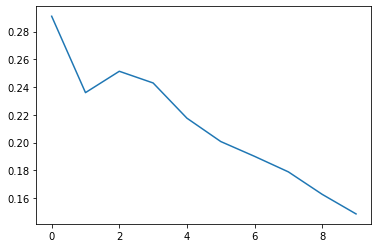

In [16]:
plt.plot(loss_list)

In [17]:
class RegressionMLP(nn.Module):
    def __init__(self, num_features):
        super(RegressionMLP, self).__init__()
        self.num_features = num_features
        self.linear1 = nn.Linear(self.num_features, 5)
        self.linear2 = nn.Linear(5, 1)
        self.relu = nn.ReLU()
        self.loss = nn.MSELoss()
        
    def forward(self, x, y):
        out = self.relu(self.linear2(self.relu(self.linear1(x))))
        loss = self.loss(out, y)
        return loss

In [18]:
learning_rate = 0.1
epoch = 10

lr_model_MLP = RegressionMLP(num_features)
optimizer1 = torch.optim.Adam(lr_model_MLP.parameters(), lr=learning_rate)

loss_list = []
for i in tqdm(range(epoch)):
    loss = lr_model_MLP(X, y)
    loss_list.append(loss.item())
#     print("loss: {}".format(loss.item()))
    optimizer1.zero_grad()
    loss.backward()
    optimizer1.step()
print(min(loss_list))


0.13214111328125


/root/Anaconda3/envs/pytorch1.3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


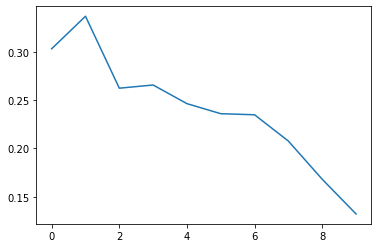

In [19]:
plt.plot(loss_list)